In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for web srapping
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import re
import csv

In [3]:
name = []
model =[]
price = []
kilometers = []
emiprice = []
offer = []
city = []

for i in range(1,11):
    for j in ['hyderabad','pune','new delhi','bangalore','mumbai','chennai','kolkata','gurgaon','ahmedabad']:

        url = "https://www.cars24.com/buy-used-cars-{}/?itm_source=Cars24Website&itm_medium=sticky_header/page={}".format(j,i)
        page = requests.get(url)
        pagecontent = page.content
        soup = BeautifulSoup(pagecontent,'html.parser')
        for i in soup.find_all('h2',class_='_3FpCg'):
            name.append(i.text)
        for i in soup.find_all('p',class_='cvakB'):         
            model.append(i.text)
        for i in soup.find_all('div',class_='_7udZZ'):
            price.append(i.text)
        for i in soup.find_all('ul',class_='bVR0c'):
            kilometers.append(i.text)
        for i in soup.find_all('div',class_='_2HFRN'):
            emiprice.append(i.text)
            city.append(j)
        for i in soup.find_all('a',class_ = '_9Ue0B'):
            if i is None:
                offer.append('nan')
            else:
                offer.append(i.text)

In [5]:
or_offer = []
for val in offer:
    if 'OFF' in val:
        or_offer.append(val.split('OFF')[0])
    else:
        or_offer.append(np.nan)

# Converting into a DataFrame

In [9]:
len(city)

1400

In [6]:
d = {'Car_name': name,
     'Car_model': model,
     'Price':price,
      'EMI/Month':emiprice,
      'Specifications':kilometers,
       'Offer_price':or_offer,
        'City':city}

In [7]:
data = pd.DataFrame(d)

In [8]:
data

,Car_name,Car_model,Price,EMI/Month,Specifications,Offer_price,City
0,2018 Maruti Alto K10,VXI Manual,"₹362,199","₹8,057/month","32,851 km1st OwnerPetrol",NaN,hyderabad
1,2015 Maruti Celerio,VXI AMT Automatic,"₹404,199","₹8,991/month","57,439 km2nd OwnerPetrol",NaN,hyderabad
2,2018 Datsun Redi Go,T (O) Manual,"₹317,799","₹7,069/month","28,385 km1st OwnerPetrol",NaN,hyderabad
3,2017 Renault Kwid,CLIMBER 1.0 AT,"₹421,799","₹9,383/month","36,933 km2nd OwnerPetrol",NaN,hyderabad
4,2017 Honda Jazz,VX 1.2 Manual,"₹604,099","₹13,438/month","75,366 km2nd OwnerPetrol",NaN,hyderabad
...,...,...,...,...,...,...,...
1395,2017 Maruti Ertiga,VDI SHVS Manual,"₹709,199","₹15,776/month","107,488 km2nd OwnerDiesel",NaN,ahmedabad
1396,2017 Maruti Ertiga,VDI SHVS Manual,"₹763,199","₹16,977/month","47,111 km1st OwnerDiesel",NaN,ahmedabad
1397,2017 Maruti Ertiga,VDI SHVS Manual,"₹686,999","₹15,282/month","84,213 km2nd OwnerDiesel",NaN,ahmedabad
1398,2017 Ford Figo Aspire,1.5 TITANIUM DIESEL Manual,"₹461,299","₹10,261/month","55,089 km1st OwnerDiesel",NaN,ahmedabad


In [9]:
# df into csv file
data.to_csv('cars2_data.csv')

# Creating the columns in DataFrame:

In [ ]:
data['Model_year'] = data['Car_name'].apply(lambda x:x.split()[0])

# brand column

data['Car_Brand'] = data['Car_name'].apply(lambda x:x.split()[1])

# model_name

data['Model_name']=data['Car_name'].apply(lambda x:x.split()[2])

# model_num

data['Model_type']=data['Car_model'].apply(lambda x:x.split()[:-1])

# fueltype

data['Fuel_type']=data['Specifications'].apply(lambda x:x.split('Owner')[-1])

# owner_type

data['Owner_type']=data['Specifications'].apply(lambda x:x.split('km')[1])

# geartype

data['Gear_type']=data['Car_model'].apply(lambda x:x.split()[-1])

# kilometeres

data['Kilometers']=data['Specifications'].apply(lambda x:x.split('km')[0])

# Joining two columns:

In [11]:
data['Model_type'] = data['Model_type'].apply(lambda x:' '.join(x))

In [12]:
Model1=[]
for i,j in zip(data['Model_name'],data['Model_type']):
    Model1.append(i+' '+j)

In [13]:
data['Model1'] = Model1

In [10]:
data['Owner_type']=data.Owner_type[0].split()[0]

# Drop() is used for extra data:

In [15]:
data.drop(['Car_name'],axis=1,inplace = True)

In [16]:
data.drop(['Car_model'],axis=1,inplace = True)

In [17]:
data.drop(['Specifications'],axis=1,inplace = True)

In [20]:
data.drop(["Model_type"],axis=1,inplace = True)

In [31]:
# data.drop(["Model1"],axis=1,inplace = True)

In [19]:
data.drop(['Model_name'],axis=1,inplace = True)

In [22]:
# rename the column:
data.rename(columns ={'Model1':'Model_type'},inplace=True)

In [23]:
# show columns:
data.columns

Index(['Price', 'EMI/Month', 'Offer_price', 'City', 'Model_year', 'Car_Brand',
       'Fuel_type', 'Owner_type', 'Gear_type', 'Kilometers', 'Model_type'],
      dtype='object')

In [24]:
# final dataframe before cleaning:
data=data[['City','Car_Brand','Model_type','Model_year','Kilometers','Fuel_type','Gear_type','Owner_type','Price','EMI/Month','Offer_price']]

In [25]:
data

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
0,hyderabad,Maruti,Alto VXI,2018,"32,851",Petrol,Manual,1st,"₹362,199","₹8,057/month",NaN
1,hyderabad,Maruti,Celerio VXI AMT,2015,"57,439",Petrol,Automatic,1st,"₹404,199","₹8,991/month",NaN
2,hyderabad,Datsun,Redi T (O),2018,"28,385",Petrol,Manual,1st,"₹317,799","₹7,069/month",NaN
3,hyderabad,Renault,Kwid CLIMBER 1.0,2017,"36,933",Petrol,AT,1st,"₹421,799","₹9,383/month",NaN
4,hyderabad,Honda,Jazz VX 1.2,2017,"75,366",Petrol,Manual,1st,"₹604,099","₹13,438/month",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1395,ahmedabad,Maruti,Ertiga VDI SHVS,2017,"107,488",Diesel,Manual,1st,"₹709,199","₹15,776/month",NaN
1396,ahmedabad,Maruti,Ertiga VDI SHVS,2017,"47,111",Diesel,Manual,1st,"₹763,199","₹16,977/month",NaN
1397,ahmedabad,Maruti,Ertiga VDI SHVS,2017,"84,213",Diesel,Manual,1st,"₹686,999","₹15,282/month",NaN
1398,ahmedabad,Ford,Figo 1.5 TITANIUM DIESEL,2017,"55,089",Diesel,Manual,1st,"₹461,299","₹10,261/month",NaN


In [27]:
data.notna().sum()

City           1400
Car_Brand      1400
Model_type     1400
Model_year     1400
Kilometers     1400
Fuel_type      1400
Gear_type      1400
Owner_type     1400
Price          1400
EMI/Month      1400
Offer_price     100
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City         1400 non-null   object
 1   Car_Brand    1400 non-null   object
 2   Model_type   1400 non-null   object
 3   Model_year   1400 non-null   object
 4   Kilometers   1400 non-null   object
 5   Fuel_type    1400 non-null   object
 6   Gear_type    1400 non-null   object
 7   Owner_type   1400 non-null   object
 8   Price        1400 non-null   object
 9   EMI/Month    1400 non-null   object
 10  Offer_price  100 non-null    object
dtypes: object(11)
memory usage: 120.4+ KB


# DATA CLEANING

In [29]:
#cleaning in Offer price:

data['Offer_price']=data['Offer_price'].fillna(0)

data

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
0,hyderabad,Maruti,Alto VXI,2018,"32,851",Petrol,Manual,1st,"₹362,199","₹8,057/month",0
1,hyderabad,Maruti,Celerio VXI AMT,2015,"57,439",Petrol,Automatic,1st,"₹404,199","₹8,991/month",0
2,hyderabad,Datsun,Redi T (O),2018,"28,385",Petrol,Manual,1st,"₹317,799","₹7,069/month",0
3,hyderabad,Renault,Kwid CLIMBER 1.0,2017,"36,933",Petrol,AT,1st,"₹421,799","₹9,383/month",0
4,hyderabad,Honda,Jazz VX 1.2,2017,"75,366",Petrol,Manual,1st,"₹604,099","₹13,438/month",0
...,...,...,...,...,...,...,...,...,...,...,...
1395,ahmedabad,Maruti,Ertiga VDI SHVS,2017,"107,488",Diesel,Manual,1st,"₹709,199","₹15,776/month",0
1396,ahmedabad,Maruti,Ertiga VDI SHVS,2017,"47,111",Diesel,Manual,1st,"₹763,199","₹16,977/month",0
1397,ahmedabad,Maruti,Ertiga VDI SHVS,2017,"84,213",Diesel,Manual,1st,"₹686,999","₹15,282/month",0
1398,ahmedabad,Ford,Figo 1.5 TITANIUM DIESEL,2017,"55,089",Diesel,Manual,1st,"₹461,299","₹10,261/month",0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City         1400 non-null   object
 1   Car_Brand    1400 non-null   object
 2   Model_type   1400 non-null   object
 3   Model_year   1400 non-null   object
 4   Kilometers   1400 non-null   object
 5   Fuel_type    1400 non-null   object
 6   Gear_type    1400 non-null   object
 7   Owner_type   1400 non-null   object
 8   Price        1400 non-null   object
 9   EMI/Month    1400 non-null   object
 10  Offer_price  1400 non-null   object
dtypes: object(11)
memory usage: 120.4+ KB


In [31]:
#cleaning in Model_year:

s1 = data['Model_year'].astype(int)

data['Model_year'] = s1

In [32]:
data

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
0,hyderabad,Maruti,Alto VXI,2018,"32,851",Petrol,Manual,1st,"₹362,199","₹8,057/month",0
1,hyderabad,Maruti,Celerio VXI AMT,2015,"57,439",Petrol,Automatic,1st,"₹404,199","₹8,991/month",0
2,hyderabad,Datsun,Redi T (O),2018,"28,385",Petrol,Manual,1st,"₹317,799","₹7,069/month",0
3,hyderabad,Renault,Kwid CLIMBER 1.0,2017,"36,933",Petrol,AT,1st,"₹421,799","₹9,383/month",0
4,hyderabad,Honda,Jazz VX 1.2,2017,"75,366",Petrol,Manual,1st,"₹604,099","₹13,438/month",0
...,...,...,...,...,...,...,...,...,...,...,...
1395,ahmedabad,Maruti,Ertiga VDI SHVS,2017,"107,488",Diesel,Manual,1st,"₹709,199","₹15,776/month",0
1396,ahmedabad,Maruti,Ertiga VDI SHVS,2017,"47,111",Diesel,Manual,1st,"₹763,199","₹16,977/month",0
1397,ahmedabad,Maruti,Ertiga VDI SHVS,2017,"84,213",Diesel,Manual,1st,"₹686,999","₹15,282/month",0
1398,ahmedabad,Ford,Figo 1.5 TITANIUM DIESEL,2017,"55,089",Diesel,Manual,1st,"₹461,299","₹10,261/month",0


In [33]:
# cleaning in Kilometers:

data['Kilometers']=data['Kilometers'].str.replace(',','')

s2 = data['Kilometers'].astype(float)

data['Kilometers'] = s2

In [34]:
data

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
0,hyderabad,Maruti,Alto VXI,2018,32851.0,Petrol,Manual,1st,"₹362,199","₹8,057/month",0
1,hyderabad,Maruti,Celerio VXI AMT,2015,57439.0,Petrol,Automatic,1st,"₹404,199","₹8,991/month",0
2,hyderabad,Datsun,Redi T (O),2018,28385.0,Petrol,Manual,1st,"₹317,799","₹7,069/month",0
3,hyderabad,Renault,Kwid CLIMBER 1.0,2017,36933.0,Petrol,AT,1st,"₹421,799","₹9,383/month",0
4,hyderabad,Honda,Jazz VX 1.2,2017,75366.0,Petrol,Manual,1st,"₹604,099","₹13,438/month",0
...,...,...,...,...,...,...,...,...,...,...,...
1395,ahmedabad,Maruti,Ertiga VDI SHVS,2017,107488.0,Diesel,Manual,1st,"₹709,199","₹15,776/month",0
1396,ahmedabad,Maruti,Ertiga VDI SHVS,2017,47111.0,Diesel,Manual,1st,"₹763,199","₹16,977/month",0
1397,ahmedabad,Maruti,Ertiga VDI SHVS,2017,84213.0,Diesel,Manual,1st,"₹686,999","₹15,282/month",0
1398,ahmedabad,Ford,Figo 1.5 TITANIUM DIESEL,2017,55089.0,Diesel,Manual,1st,"₹461,299","₹10,261/month",0


In [35]:
# cleaning in price column:

data['Price']=data['Price'].str.replace('₹','')

data['Price']=data['Price'].str.replace(',','')

s3 = data['Price'].astype(float)

data['Price'] = s3

In [36]:
data

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
0,hyderabad,Maruti,Alto VXI,2018,32851.0,Petrol,Manual,1st,362199.0,"₹8,057/month",0
1,hyderabad,Maruti,Celerio VXI AMT,2015,57439.0,Petrol,Automatic,1st,404199.0,"₹8,991/month",0
2,hyderabad,Datsun,Redi T (O),2018,28385.0,Petrol,Manual,1st,317799.0,"₹7,069/month",0
3,hyderabad,Renault,Kwid CLIMBER 1.0,2017,36933.0,Petrol,AT,1st,421799.0,"₹9,383/month",0
4,hyderabad,Honda,Jazz VX 1.2,2017,75366.0,Petrol,Manual,1st,604099.0,"₹13,438/month",0
...,...,...,...,...,...,...,...,...,...,...,...
1395,ahmedabad,Maruti,Ertiga VDI SHVS,2017,107488.0,Diesel,Manual,1st,709199.0,"₹15,776/month",0
1396,ahmedabad,Maruti,Ertiga VDI SHVS,2017,47111.0,Diesel,Manual,1st,763199.0,"₹16,977/month",0
1397,ahmedabad,Maruti,Ertiga VDI SHVS,2017,84213.0,Diesel,Manual,1st,686999.0,"₹15,282/month",0
1398,ahmedabad,Ford,Figo 1.5 TITANIUM DIESEL,2017,55089.0,Diesel,Manual,1st,461299.0,"₹10,261/month",0


In [37]:
# cleaning in Emi/Month column:

data['EMI/Month']=data['EMI/Month'].str.replace('₹','')

data['EMI/Month']=data['EMI/Month'].str.replace(',','')

data['EMI/Month']=data['EMI/Month'].str.replace('/','')

data['EMI/Month']=data['EMI/Month'].str.replace('month','')

s4 = data['EMI/Month'].astype(float)

data['EMI/Month']=s4

In [38]:
data

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
0,hyderabad,Maruti,Alto VXI,2018,32851.0,Petrol,Manual,1st,362199.0,8057.0,0
1,hyderabad,Maruti,Celerio VXI AMT,2015,57439.0,Petrol,Automatic,1st,404199.0,8991.0,0
2,hyderabad,Datsun,Redi T (O),2018,28385.0,Petrol,Manual,1st,317799.0,7069.0,0
3,hyderabad,Renault,Kwid CLIMBER 1.0,2017,36933.0,Petrol,AT,1st,421799.0,9383.0,0
4,hyderabad,Honda,Jazz VX 1.2,2017,75366.0,Petrol,Manual,1st,604099.0,13438.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1395,ahmedabad,Maruti,Ertiga VDI SHVS,2017,107488.0,Diesel,Manual,1st,709199.0,15776.0,0
1396,ahmedabad,Maruti,Ertiga VDI SHVS,2017,47111.0,Diesel,Manual,1st,763199.0,16977.0,0
1397,ahmedabad,Maruti,Ertiga VDI SHVS,2017,84213.0,Diesel,Manual,1st,686999.0,15282.0,0
1398,ahmedabad,Ford,Figo 1.5 TITANIUM DIESEL,2017,55089.0,Diesel,Manual,1st,461299.0,10261.0,0


In [39]:
# cleaning in Offer_price column:

data['Offer_price']=data['Offer_price'].str.replace('₹','')

data['Offer_price']=data['Offer_price'].str.replace(',','')

s5 = data['Offer_price'].astype(float)

data['Offer_price'] = s5

data['Offer_price']=data['Offer_price'].fillna(0)

In [40]:
data

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
0,hyderabad,Maruti,Alto VXI,2018,32851.0,Petrol,Manual,1st,362199.0,8057.0,0.0
1,hyderabad,Maruti,Celerio VXI AMT,2015,57439.0,Petrol,Automatic,1st,404199.0,8991.0,0.0
2,hyderabad,Datsun,Redi T (O),2018,28385.0,Petrol,Manual,1st,317799.0,7069.0,0.0
3,hyderabad,Renault,Kwid CLIMBER 1.0,2017,36933.0,Petrol,AT,1st,421799.0,9383.0,0.0
4,hyderabad,Honda,Jazz VX 1.2,2017,75366.0,Petrol,Manual,1st,604099.0,13438.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1395,ahmedabad,Maruti,Ertiga VDI SHVS,2017,107488.0,Diesel,Manual,1st,709199.0,15776.0,0.0
1396,ahmedabad,Maruti,Ertiga VDI SHVS,2017,47111.0,Diesel,Manual,1st,763199.0,16977.0,0.0
1397,ahmedabad,Maruti,Ertiga VDI SHVS,2017,84213.0,Diesel,Manual,1st,686999.0,15282.0,0.0
1398,ahmedabad,Ford,Figo 1.5 TITANIUM DIESEL,2017,55089.0,Diesel,Manual,1st,461299.0,10261.0,0.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         1400 non-null   object 
 1   Car_Brand    1400 non-null   object 
 2   Model_type   1400 non-null   object 
 3   Model_year   1400 non-null   int32  
 4   Kilometers   1400 non-null   float64
 5   Fuel_type    1400 non-null   object 
 6   Gear_type    1400 non-null   object 
 7   Owner_type   1400 non-null   object 
 8   Price        1400 non-null   float64
 9   EMI/Month    1400 non-null   float64
 10  Offer_price  1400 non-null   float64
dtypes: float64(4), int32(1), object(6)
memory usage: 115.0+ KB


In [42]:
data.notna().sum()

City           1400
Car_Brand      1400
Model_type     1400
Model_year     1400
Kilometers     1400
Fuel_type      1400
Gear_type      1400
Owner_type     1400
Price          1400
EMI/Month      1400
Offer_price    1400
dtype: int64

In [43]:
# converted into csv file:
data.to_csv('cars_data.csv')

# DATA ANALYZING

In [2]:
Cars24=pd.read_csv('cars24_data.csv')
import warnings
warnings.filterwarnings('ignore')

In [3]:
Cars24

,Unnamed: 0,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
0,0,hyderabad,Maruti,Swift VXI OPT,2017,29996.0,Petrol,Manual,2nd,510299.0,11351.0,35000.0
1,1,hyderabad,Hyundai,i20 1.4 SX,2016,57997.0,Diesel,Manual,2nd,660699.0,14697.0,0.0
2,2,hyderabad,Datsun,Redi T (O),2018,28385.0,Petrol,Manual,2nd,334099.0,7432.0,0.0
3,3,hyderabad,Hyundai,VENUE 1.5 SX CRDI,2020,40139.0,Diesel,MT,2nd,1035499.0,23034.0,0.0
4,4,hyderabad,Maruti,Dzire VDI,2019,21577.0,Diesel,Manual,2nd,735499.0,16361.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,ahmedabad,Honda,City VX MT DIESEL,2017,103475.0,Diesel,Manual,2nd,786599.0,17497.0,0.0
1396,1396,ahmedabad,Maruti,Ertiga VDI SHVS LIMITED EDITION,2018,71257.0,Diesel,Manual,2nd,797199.0,17733.0,0.0
1397,1397,ahmedabad,Maruti,Swift VDI,2015,183063.0,Diesel,Manual,2nd,404999.0,9009.0,0.0
1398,1398,ahmedabad,Datsun,Redi T (O),2018,23684.0,Petrol,Manual,2nd,306199.0,6811.0,0.0


In [4]:
Cars24.drop(['Unnamed: 0'],axis=1,inplace = True)

In [98]:
Cars24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         1400 non-null   object 
 1   Car_Brand    1400 non-null   object 
 2   Model_type   1400 non-null   object 
 3   Model_year   1400 non-null   int64  
 4   Kilometers   1400 non-null   float64
 5   Fuel_type    1400 non-null   object 
 6   Gear_type    1400 non-null   object 
 7   Owner_type   1400 non-null   object 
 8   Price        1400 non-null   float64
 9   EMI/Month    1400 non-null   float64
 10  Offer_price  1400 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 120.4+ KB


In [99]:
Cars24['City'].value_counts()

hyderabad    200
pune         200
mumbai       200
chennai      200
kolkata      200
gurgaon      200
ahmedabad    200
Name: City, dtype: int64

In [100]:
Cars24['Car_Brand'].value_counts()

Maruti        540
Hyundai       280
Honda         160
Ford           90
Volkswagen     90
Toyota         80
Renault        60
Mahindra       40
Datsun         30
Tata           10
Nissan         10
Audi           10
Name: Car_Brand, dtype: int64

In [101]:
Cars24['Model_type'].value_counts()

Swift VDI BS IV             90
Ertiga VDI SHVS             70
Elite SPORTZ 1.2            70
Wagon VXI                   60
Polo HIGHLINE1.2L PETROL    30
                            ..
NEXON XM 1.5                10
Baleno ALPHA 1.2 K12        10
Xcent SX 1.2                10
City VX CVT PETROL          10
Fortuner 3.0 MT 4X4         10
Name: Model_type, Length: 93, dtype: int64

In [102]:
Cars24['Model_year'].value_counts()

2016    280
2018    210
2017    190
2015    180
2014    160
2012    130
2013    110
2011     40
2020     30
2019     30
2010     20
2009     20
Name: Model_year, dtype: int64

In [103]:
Cars24['Kilometers'].value_counts()

29996.0     10
69855.0     10
6208.0      10
14631.0     10
52661.0     10
            ..
30243.0     10
30363.0     10
62533.0     10
93844.0     10
147136.0    10
Name: Kilometers, Length: 140, dtype: int64

In [104]:
Cars24['Fuel_type'].value_counts()

Petrol    810
Diesel    590
Name: Fuel_type, dtype: int64

In [105]:
Cars24['Gear_type'].value_counts()

Manual       1240
Automatic     110
AT             20
MT             10
PETROL         10
TI-VCT         10
Name: Gear_type, dtype: int64

# Data Analysis on Describe():

In [107]:
Cars24['City'].describe()

count          1400
unique            7
top       hyderabad
freq            200
Name: City, dtype: object

In [108]:
Cars24['Car_Brand'].describe()

count       1400
unique        12
top       Maruti
freq         540
Name: Car_Brand, dtype: object

In [109]:
Cars24['Model_type'].describe()

count                1400
unique                 93
top       Swift VDI BS IV
freq                   90
Name: Model_type, dtype: object

In [110]:
Cars24['Model_year'].describe()

count    1400.000000
mean     2015.292857
std         2.341460
min      2009.000000
25%      2014.000000
50%      2016.000000
75%      2017.000000
max      2020.000000
Name: Model_year, dtype: float64

In [111]:
Cars24['Kilometers'].describe()

count      1400.000000
mean      64415.235714
std       42196.048659
min          58.000000
25%       31433.000000
50%       61836.000000
75%       84404.000000
max      242900.000000
Name: Kilometers, dtype: float64

In [112]:
Cars24['Fuel_type'].describe()

count       1400
unique         2
top       Petrol
freq         810
Name: Fuel_type, dtype: object

In [113]:
Cars24['Gear_type'].describe()

count       1400
unique         6
top       Manual
freq        1240
Name: Gear_type, dtype: object

In [114]:
Cars24['Owner_type'].describe()

count     1400
unique       1
top        2nd
freq      1400
Name: Owner_type, dtype: object

In [115]:
Cars24.head(10)

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
0,hyderabad,Maruti,Swift VXI OPT,2017,29996.0,Petrol,Manual,2nd,510299.0,11351.0,35000.0
1,hyderabad,Hyundai,i20 1.4 SX,2016,57997.0,Diesel,Manual,2nd,660699.0,14697.0,0.0
2,hyderabad,Datsun,Redi T (O),2018,28385.0,Petrol,Manual,2nd,334099.0,7432.0,0.0
3,hyderabad,Hyundai,VENUE 1.5 SX CRDI,2020,40139.0,Diesel,MT,2nd,1035499.0,23034.0,0.0
4,hyderabad,Maruti,Dzire VDI,2019,21577.0,Diesel,Manual,2nd,735499.0,16361.0,0.0
5,hyderabad,Maruti,Vitara VDI AMT,2018,81477.0,Diesel,Manual,2nd,820699.0,18256.0,0.0
6,hyderabad,Hyundai,NEW 1.1 SPORTS AMT,2018,25002.0,Petrol,Manual,2nd,547199.0,12172.0,0.0
7,hyderabad,Renault,Kwid CLIMBER 1.0,2017,36933.0,Petrol,AT,2nd,421799.0,9383.0,0.0
8,hyderabad,Honda,Jazz VX 1.2,2017,75366.0,Petrol,Manual,2nd,604099.0,13438.0,0.0
9,hyderabad,Hyundai,i10 MAGNA 1.2,2010,55412.0,Petrol,Manual,2nd,322099.0,7165.0,0.0


In [116]:
Cars24.tail(100)

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
1300,mumbai,Volkswagen,Polo HIGHLINE1.2L PETROL,2016,30243.0,Petrol,Manual,2nd,488299.0,10862.0,0.0
1301,mumbai,Maruti,Baleno ALPHA 1.2 K12,2017,69269.0,Petrol,Manual,2nd,638199.0,14196.0,0.0
1302,mumbai,Maruti,Ertiga VDI SHVS,2016,31217.0,Diesel,Manual,2nd,788599.0,17542.0,0.0
1303,mumbai,Hyundai,Elite SPORTZ 1.2,2016,129789.0,Petrol,Manual,2nd,530699.0,11805.0,0.0
1304,mumbai,Renault,Kwid RXL,2019,27241.0,Petrol,Manual,2nd,369599.0,8222.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1395,ahmedabad,Honda,City VX MT DIESEL,2017,103475.0,Diesel,Manual,2nd,786599.0,17497.0,0.0
1396,ahmedabad,Maruti,Ertiga VDI SHVS LIMITED EDITION,2018,71257.0,Diesel,Manual,2nd,797199.0,17733.0,0.0
1397,ahmedabad,Maruti,Swift VDI,2015,183063.0,Diesel,Manual,2nd,404999.0,9009.0,0.0
1398,ahmedabad,Datsun,Redi T (O),2018,23684.0,Petrol,Manual,2nd,306199.0,6811.0,0.0


In [117]:
Cars24.describe()

,Model_year,Kilometers,Price,EMI/Month,Offer_price
count,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000
mean,2015.292857,64415.235714,5.723654e+05,12731.935714,2007.142857
std,2.341460,42196.048659,2.487196e+05,5532.597508,7801.592943
min,2009.000000,58.000000,2.033990e+05,4524.000000,0.000000
25%,2014.000000,31433.000000,3.782490e+05,8413.750000,0.000000
50%,2016.000000,61836.000000,5.148490e+05,11452.500000,0.000000
75%,2017.000000,84404.000000,7.312990e+05,16267.250000,0.000000
max,2020.000000,242900.000000,1.689399e+06,37580.000000,43000.000000


# Categorical Data Analysis

In [118]:
# Pivot table based on Kilometers by objects
pd.pivot_table(Cars24,index = ['City','Car_Brand','Model_type','Fuel_type','Gear_type','Owner_type'])['Kilometers'].to_frame()

Kilometers
City      Car_Brand  Model_type                  Fuel_type Gear_type Owner_type            
ahmedabad Datsun     Redi T (O)                  Petrol    Manual    2nd            23684.0
          Ford       Figo 1.5 TITANIUM DIESEL    Diesel    Manual    2nd            55089.0
          Honda      City VX MT DIESEL           Diesel    Manual    2nd           103475.0
          Hyundai    Creta 1.4 E PLUS CRDI       Diesel    Manual    2nd           241497.0
                     Creta 1.6 CRDI SX PLUS AUTO Diesel    Automatic 2nd            89732.0
...                                                                                     ...
pune      Volkswagen Jetta HIGHLINE TDI AT       Diesel    Automatic 2nd            96877.0
                     Polo GT TSI 1.2 PETROL AT   Petrol    Automatic 2nd            48730.0
                     Polo HIGHLINE1.2L DIESEL    Diesel    Manual    2nd            67595.0
                     Polo HIGHLINE1.2L PETROL    Petrol    Manual    2nd            63908.0
                     Vento COMFORTLINE PETROL    Petrol    Manual    2nd            23139.0

[118 rows x 1 columns]

# Numerical Data Analysis

In [119]:
pd.pivot_table(Cars24,index = ['Car_Brand','Model_year'])[['Kilometers','Offer_price','Price']]

Kilometers   Offer_price         Price
Car_Brand  Model_year                                           
Audi       2014         66027.000000      0.000000  1.383199e+06
Datsun     2018         18985.333333      0.000000  3.068323e+05
Ford       2012         68356.000000      0.000000  3.130990e+05
           2014         65372.000000      0.000000  4.980990e+05
           2016         17218.500000      0.000000  6.720990e+05
           2017         27573.500000      0.000000  4.497990e+05
           2018         20706.000000      0.000000  6.604990e+05
           2020          5634.000000      0.000000  1.248999e+06
Honda      2009        120464.000000      0.000000  3.633990e+05
           2011        101973.000000  17000.000000  3.068990e+05
           2013         81316.000000      0.000000  3.250990e+05
           2014         60387.000000  10333.333333  5.001657e+05
           2015         64773.333333   7833.333333  6.468157e+05
           2016         35112.000000      0.000000  7.510990e+05
           2017         89420.500000      0.000000  6.953490e+05
           2018         25586.000000      0.000000  8.259990e+05
Hyundai    2009        101309.000000      0.000000  2.033990e+05
           2010         48667.500000      0.000000  2.783990e+05
           2011         56005.000000      0.000000  2.758990e+05
           2012           288.000000      0.000000  5.114990e+05
           2014         30691.000000      0.000000  4.623323e+05
           2015         40322.500000      0.000000  5.590990e+05
           2016         76232.125000      0.000000  5.233490e+05
           2017         65444.600000      0.000000  6.419790e+05
           2018         91634.666667      0.000000  6.677323e+05
           2020         28854.500000  21500.000000  9.000990e+05
Mahindra   2014         45347.000000      0.000000  5.379990e+05
           2017         32277.000000      0.000000  6.784990e+05
           2018         85190.500000      0.000000  6.934990e+05
Maruti     2011         75822.000000      0.000000  3.125990e+05
           2012        110441.375000      0.000000  3.962740e+05
           2013         52654.666667      0.000000  3.688323e+05
           2014         60822.400000      0.000000  3.697990e+05
           2015        115955.800000   6200.000000  4.285790e+05
           2016         53544.100000      0.000000  6.728890e+05
           2017         66213.750000   4375.000000  7.477365e+05
           2018         56953.666667    833.333333  6.220657e+05
           2019         38141.000000      0.000000  8.268490e+05
Nissan     2016         61139.000000      0.000000  5.517990e+05
Renault    2016         39208.000000      0.000000  3.062990e+05
           2017         36933.000000      0.000000  4.217990e+05
           2018         12986.000000      0.000000  4.734990e+05
           2019         27241.000000      0.000000  3.695990e+05
Tata       2018         96906.000000      0.000000  7.480990e+05
Toyota     2011         87759.000000  29000.000000  3.247990e+05
           2012        101205.500000      0.000000  7.334990e+05
           2013         74189.000000      0.000000  1.197399e+06
           2015        124927.333333  11000.000000  9.193990e+05
           2016        171099.000000      0.000000  1.689399e+06
Volkswagen 2012         67595.000000   5000.000000  2.583990e+05
           2014         77128.000000      0.000000  3.414990e+05
           2015         80392.500000      0.000000  7.980990e+05
           2016         45927.666667      0.000000  5.740657e+05
           2018         20625.500000   2500.000000  6.334490e+05

# UNI-Variant

# Pie_plot

<AxesSubplot:ylabel='City'>

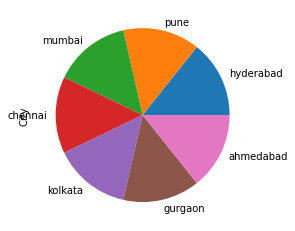

In [54]:
Cars24['City'].value_counts().plot(kind = 'pie')

Here we observed every "City" have same number of Cars through "Pieplot"

# Bar_plot

<AxesSubplot:>

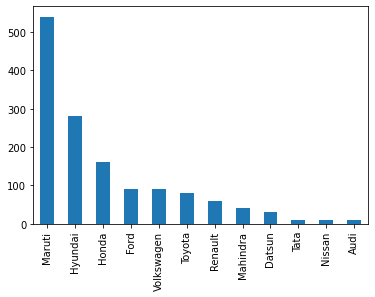

In [134]:
Cars24['Car_Brand'].value_counts().plot(kind = 'bar')

Here we observed "Maruthi" cars has highest numbers of used cars in Car_Brand through "Barplot"

# Hist_plot

<AxesSubplot:ylabel='Frequency'>

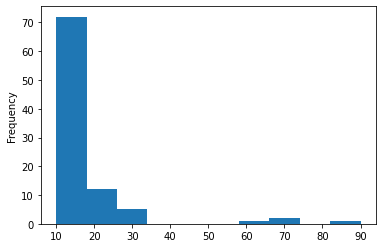

In [136]:
Cars24['Model_type'].value_counts().plot(kind='hist')

Observation of model type is done in hist_plot,because model years are maintained by same year INTERVALS/Frequency.

# Count_plot

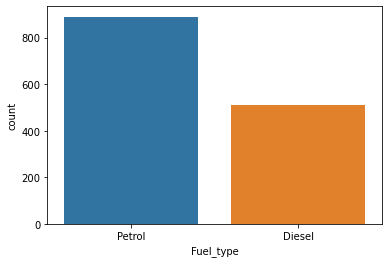

In [41]:
sns.countplot(Cars24['Fuel_type'])
plt.show()

Observations on fuel_types have in each cars,then we got more pertol fuel type cars in data.

# Dist_plot

In [43]:
Cars24['Kilometers'].describe()

count      1400.000000
mean      63695.261429
std       41457.506351
min          58.000000
25%       31217.000000
50%       57439.000000
75%       87618.000000
max      234695.000000
Name: Kilometers, dtype: float64

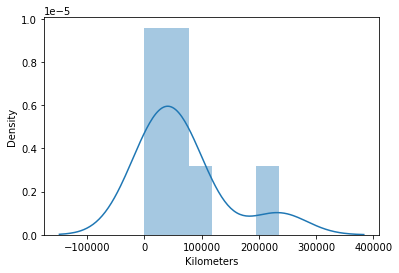

In [42]:
sns.distplot(Cars24['Kilometers'].describe())
plt.show()

Here we observed in each city 200 cars are placed, then every car has their different kilometers range on depends on city we distbuted by max range of kilometers for cars with its density.

# Box_plot

In [44]:
Cars24['Price'].describe()

count    1.400000e+03
mean     5.907711e+05
std      2.718196e+05
min      2.583990e+05
25%      3.789240e+05
50%      5.404990e+05
75%      7.360990e+05
max      1.689399e+06
Name: Price, dtype: float64

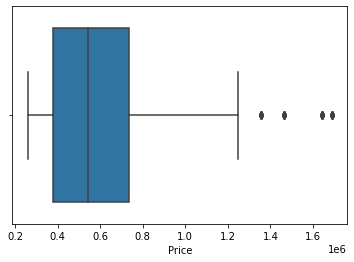

In [53]:
sns.boxplot(x='Price',data=Cars24)
plt.show()

Here Boxplot differs every min and max values of price with 'blue colored box' and 'black dots' are mentioned as "Outliers"

# Bi-variant

<AxesSubplot:xlabel='Car_Brand'>

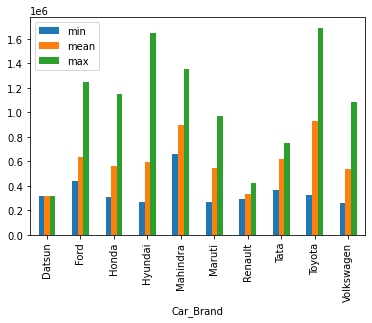

In [58]:
Cars24.groupby(['Car_Brand'])['Price'].agg({'min','mean','max'}).plot(kind = 'bar')

Here we observed every car brand has different prices and toyota has maximum number of cars,
And we observed every car brand has hyundai and maruti has minimum number of cars,These values observed by Bar_plot.

In [73]:
Cars24.groupby(['Model_year'])['Price'].agg({'min','mean','max'})

,mean,min,max
Model_year,,,
2009,363399.000000,363399.0,363399.0
2010,322099.000000,322099.0,322099.0
2011,309939.000000,271199.0,331799.0
2012,477082.333333,258399.0,1177099.0
2013,357327.571429,289899.0,429099.0
2014,423257.730159,332099.0,533599.0
2015,597494.833333,296199.0,1151099.0
2016,657722.333333,294799.0,1689399.0
2017,712238.130435,421799.0,1642699.0


# Box_plot on Aggfunc()

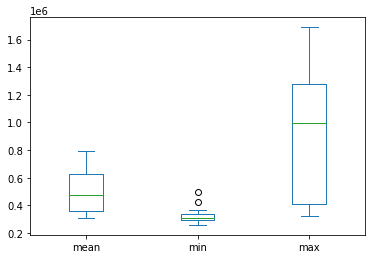

In [72]:
Cars24.groupby(['Model_year'])['Price'].agg({'min','mean','max'}).plot(kind='box')

Here we observed individual model years has different prices also,they described by max,mean,min values through Box plot.

# Violin_plot()

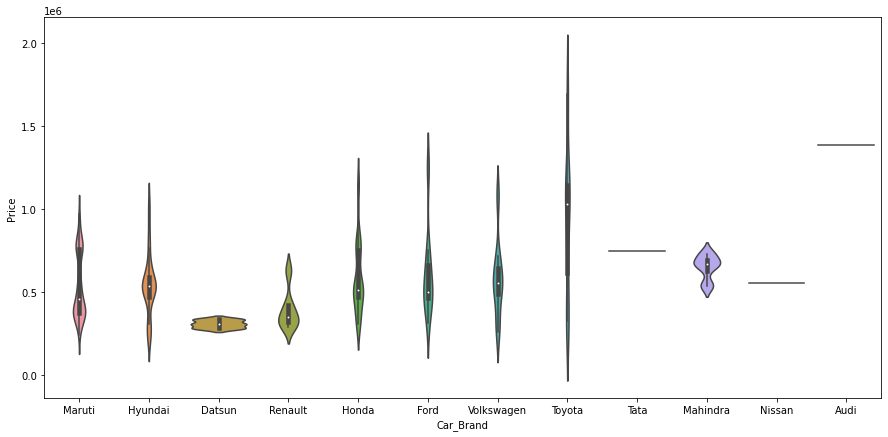

In [5]:
plt.figure(figsize=(15,7))
sns.violinplot(x=Cars24["Car_Brand"], y=Cars24["Price"])
plt.show()

Here cars differs by car_brand and price through Violin_plot,result has given like Toyota is highestprice holder.

In [23]:
Cars24.groupby(['Price'])['Kilometers'].agg({'min','mean','max'})

,mean,min,max
Price,,,
258399.0,67595.0,67595.0,67595.0
265999.0,28719.0,28719.0,28719.0
271199.0,56005.0,56005.0,56005.0
289899.0,17901.0,17901.0,17901.0
294799.0,23390.0,23390.0,23390.0
...,...,...,...
1248999.0,5634.0,5634.0,5634.0
1355399.0,46051.0,46051.0,46051.0
1465799.0,62779.0,62779.0,62779.0


# Scatter_plot

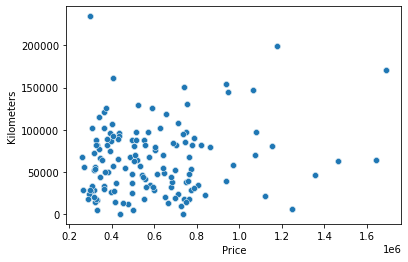

In [18]:
sns.scatterplot(x=Cars24['Price'],y=Cars24['Kilometers'])
plt.show()

Here we observed spots of collision of price and Kilometers,It differs all price factors of kilometers in Bluespots through 'Scatter_plot'.

In [50]:
Cars24.groupby(['Car_Brand'])['EMI/Month'].value_counts().to_frame()

EMI/Month
Car_Brand  EMI/Month           
Datsun     7069.0            10
Ford       9750.0            10
           10261.0           10
           11009.0           10
           11870.0           10
...                         ...
Volkswagen 12310.0           10
           13667.0           10
           14377.0           10
           15871.0           10
           24022.0           10

[141 rows x 1 columns]

# Box_plot

<AxesSubplot:xlabel='Car_Brand', ylabel='EMI/Month'>

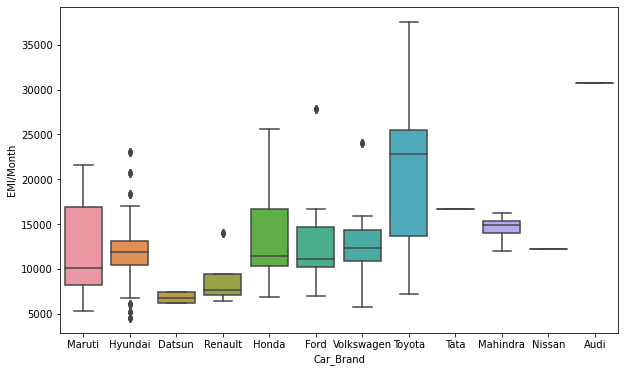

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x=Cars24['Car_Brand'],y=Cars24['EMI/Month'])

Boxplot used for showing difference and analysis of every Car_Brand and EMI/Month values,TOYOTA grabs highest place in this analysis,DATSUN grabs least place in this analysis. 

# Relationship_plot

<Figure size 1080x576 with 0 Axes>

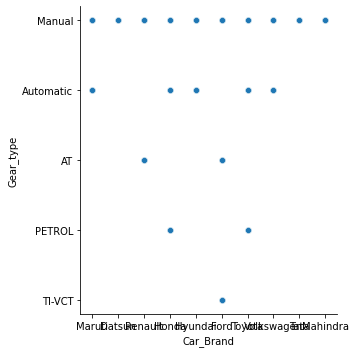

In [7]:
plt.figure(figsize=(15,8))
sns.relplot(x=Cars24['Car_Brand'],y=Cars24['Gear_type'])
plt.show()

In [ ]:
Gear_type observations done at four types of Gear_types Based on Car_Brand through "Relationship plot".

# Multi-variant

In [101]:
pd.pivot_table(Cars24,index = ['City','Car_Brand','Price'])['Offer_price'].to_frame()

Offer_price
City      Car_Brand  Price                 
ahmedabad Datsun     306199.0           0.0
          Ford       461299.0           0.0
          Honda      786599.0           0.0
          Hyundai    471199.0           0.0
                     822999.0           0.0
...                                     ...
pune      Volkswagen 258399.0        5000.0
                     516299.0           0.0
                     646299.0           0.0
                     713499.0           0.0
                     1079899.0          0.0

[140 rows x 1 columns]

In [6]:
Cars24.groupby(["City"])['Car_Brand','Kilometers','Model_type','Gear_type','Offer_price',"EMI/Month"].describe()

Kilometers                                                     \
               count      mean           std      min      25%      50%   
City                                                                      
ahmedabad      200.0  61757.70  38789.034372    146.0  37849.5  62585.0   
chennai        200.0  76113.60  45543.497864  17570.0  42630.5  80173.0   
gurgaon        200.0  58962.80  36658.306145  11773.0  29344.5  46597.0   
hyderabad      200.0  67224.95  51271.317378   5634.0  28635.5  56425.5   
kolkata        200.0  60618.93  32233.198090  14631.0  37826.0  56005.0   
mumbai         200.0  64729.15  48210.793677     58.0  29634.5  50245.5   
pune           200.0  56459.70  30187.099508   4575.0  32685.5  59943.5   

                              Offer_price          ...                   \
                75%       max       count    mean  ...     75%      max   
City                                               ...                    
ahmedabad  84404.00  150666.0       200.0   250.0  ...     0.0   5000.0   
chennai    89910.75  199118.0       200.0  7750.0  ...  5000.0  43000.0   
gurgaon    93392.00  126101.0       200.0     0.0  ...     0.0      0.0   
hyderabad  83106.25  234695.0       200.0     0.0  ...     0.0      0.0   
kolkata    81316.00  154837.0       200.0     0.0  ...     0.0      0.0   
mumbai     91414.50  171099.0       200.0     0.0  ...     0.0      0.0   
pune       70650.50  125499.0       200.0  2650.0  ...     0.0  31000.0   

          EMI/Month                                                    \
              count      mean          std     min       25%      50%   
City                                                                    
ahmedabad     200.0  12634.85  4291.083525  6998.0   9078.00  11700.5   
chennai       200.0  14566.90  5962.596353  7225.0  11353.25  13005.0   
gurgaon       200.0   9939.45  2954.374603  6575.0   7850.50   8815.5   
hyderabad     200.0  10857.10  5608.054212  5917.0   7141.00   8590.0   
kolkata       200.0  11338.56  4078.763635  6033.0   7635.00  11033.0   
mumbai        200.0  16583.80  5922.296008  9750.0  12644.00  16567.5   
pune          200.0  16069.20  8338.175183  5748.0   9934.75  15124.0   

                              
                75%      max  
City                          
ahmedabad  15925.50  23873.0  
chennai    15111.75  30150.0  
gurgaon    11381.25  16612.0  
hyderabad  12910.75  27783.0  
kolkata    15093.00  20807.0  
mumbai     17259.75  37580.0  
pune       19633.25  36541.0  

[7 rows x 24 columns]

In [76]:
Cars24.groupby(['City','Car_Brand','Kilometers'])['Offer_price'].count().to_frame()

Offer_price
City      Car_Brand  Kilometers             
ahmedabad Datsun     23684.0              10
          Ford       55089.0              10
          Honda      103475.0             10
          Hyundai    25016.0              10
                     89732.0              10
...                                      ...
pune      Volkswagen 23139.0              10
                     48730.0              10
                     63908.0              10
                     67595.0              10
                     96877.0              10

[140 rows x 1 columns]

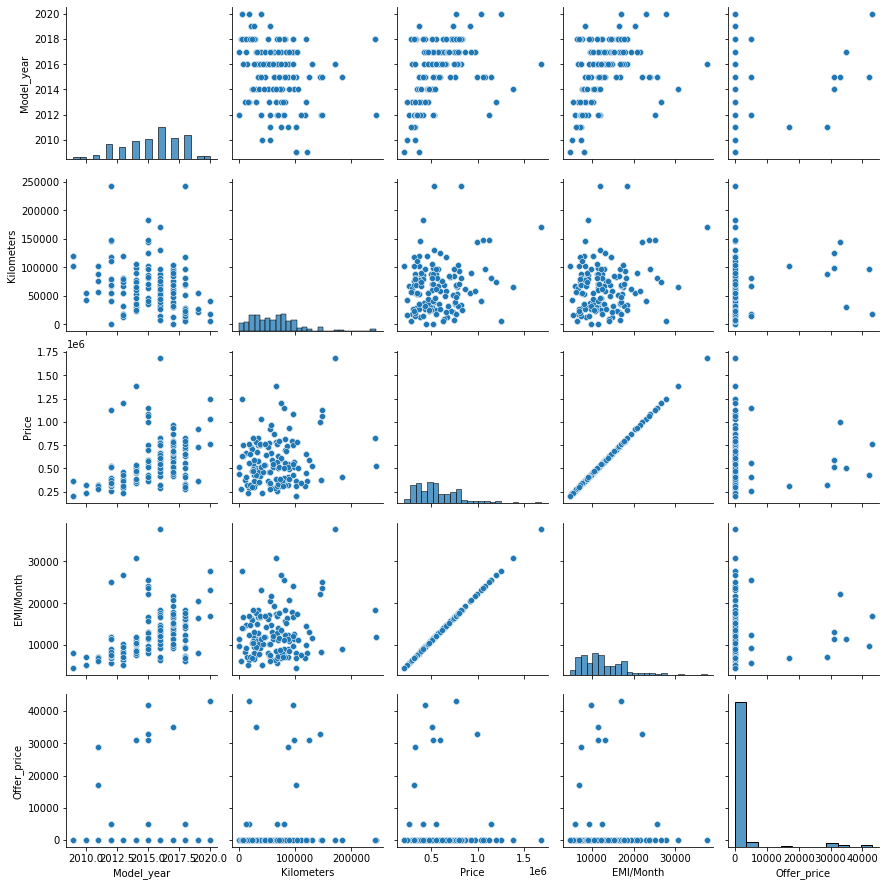

In [120]:
sns.pairplot(Cars24)

Pair plot is used for diffrence visualization, because the measurements and classes (CARS) provide an excellent way to distinguish classes. The data is mapped in the grid below. Because there are 4 measurements, it creates a 4x4 plot.

# Heatmap

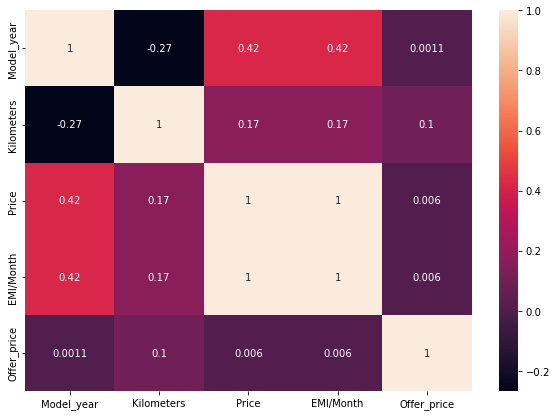

In [9]:
plt.figure(figsize = (10,7))
sns.heatmap(Cars24.corr(),annot=True);

The heatmap colors plot below uses random data again. This time it’s using a different color map (cmap), with the ‘light pink’,which as nothing but colors of pink and dark violet.It also uses square blocks.

# All plots with hue order

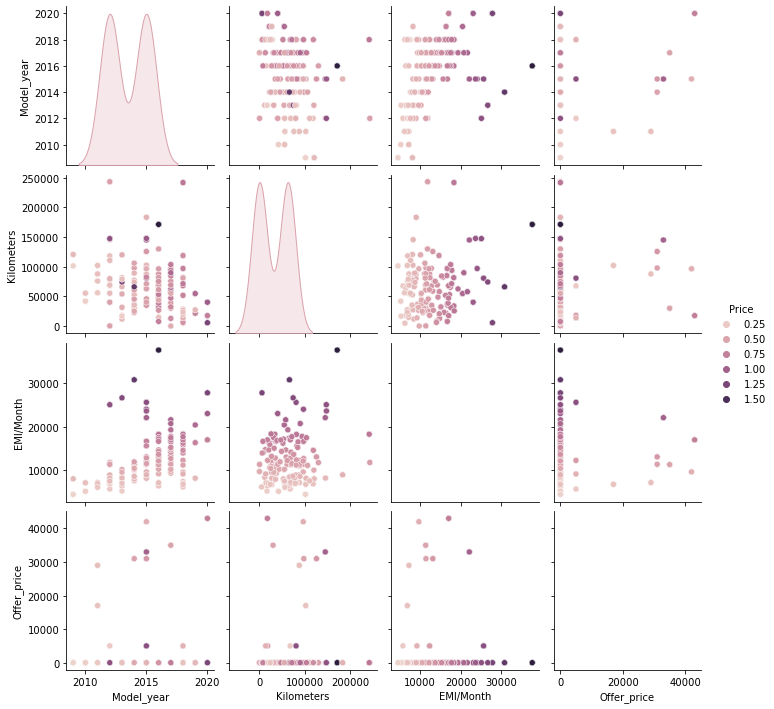

In [122]:
sns.pairplot(data=Cars24,hue='Price')
plt.show()

In [ ]:
Pair plot is used for diffrence visualization, because the cars and price(modelyear,kilometers,EMI/Month) provide an excellent way to distinguish classes. The data is mapped in the grid below. Because there are 4 measurements, It creates a 4x4 plot.

# Problem Statement

In [10]:
popular_models = Cars24.groupby('Car_Brand').Model_type.value_counts().groupby(level=0).nlargest(1).to_frame()
popular_models

,,,Model_type
Car_Brand,Car_Brand,Model_type,
Datsun,Datsun,Redi T (O),10
Ford,Ford,Ecosport 1.5 TITANIUM PLUS TI VCT,10
Honda,Honda,City V MT PETROL,30
Hyundai,Hyundai,Elite SPORTZ 1.2,70
Mahindra,Mahindra,TUV300 T8,20
Maruti,Maruti,Ertiga VDI SHVS,100
Renault,Renault,Kwid RXL,20
Tata,Tata,NEXON XM 1.5,10
Toyota,Toyota,Fortuner 3.0 AT 4X2,20


# Customer Problem Statment

CUSTOMER SEARCHING FOR USED CARS BELOW 250000/- IN BEST CONDITION
1.searching for used cars for price below 250000/-
2.Next followed data has filter with different analysis like
  1.year of model
  2.how many specified cars in certain  gear_type?
  3.which fuel type are specified for that cars?
  4.how many kilometers completed for every car with customer requirements/
  5.price analysis on each car by price,EMI price,OFFER price.
  

In [131]:
cars_250000 = Cars24[Cars24['Price']<=250000]
cars_250000

,City,Car_Brand,Model_type,Model_year,Kilometers,Fuel_type,Gear_type,Owner_type,Price,EMI/Month,Offer_price
31,pune,Hyundai,i10 MAGNA 1.2 KAPPA2,2010,41923.0,Petrol,Manual,2nd,234699.0,5221.0,0.0
99,kolkata,Maruti,Alto LXI,2013,16695.0,Petrol,Manual,2nd,237399.0,5281.0,0.0
112,gurgaon,Hyundai,i10 MAGNA 1.2,2009,101309.0,Petrol,Manual,2nd,203399.0,4524.0,0.0
171,pune,Hyundai,i10 MAGNA 1.2 KAPPA2,2010,41923.0,Petrol,Manual,2nd,234699.0,5221.0,0.0
239,kolkata,Maruti,Alto LXI,2013,16695.0,Petrol,Manual,2nd,237399.0,5281.0,0.0
252,gurgaon,Hyundai,i10 MAGNA 1.2,2009,101309.0,Petrol,Manual,2nd,203399.0,4524.0,0.0
311,pune,Hyundai,i10 MAGNA 1.2 KAPPA2,2010,41923.0,Petrol,Manual,2nd,234699.0,5221.0,0.0
379,kolkata,Maruti,Alto LXI,2013,16695.0,Petrol,Manual,2nd,237399.0,5281.0,0.0
392,gurgaon,Hyundai,i10 MAGNA 1.2,2009,101309.0,Petrol,Manual,2nd,203399.0,4524.0,0.0
451,pune,Hyundai,i10 MAGNA 1.2 KAPPA2,2010,41923.0,Petrol,Manual,2nd,234699.0,5221.0,0.0


In [132]:
cars_250000.drop(['Offer_price'],axis=1,inplace = True)

In [133]:
cars_250000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 31 to 1372
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        30 non-null     object 
 1   Car_Brand   30 non-null     object 
 2   Model_type  30 non-null     object 
 3   Model_year  30 non-null     int64  
 4   Kilometers  30 non-null     float64
 5   Fuel_type   30 non-null     object 
 6   Gear_type   30 non-null     object 
 7   Owner_type  30 non-null     object 
 8   Price       30 non-null     float64
 9   EMI/Month   30 non-null     float64
dtypes: float64(3), int64(1), object(6)
memory usage: 2.6+ KB


In [40]:
len('cars_250000')

11

On above dataframe we observed 11 cars are satisfied customer requirments.

Here we observed every car having offer price,but few of cars having best offer price among all of those.

In [58]:
ModelAnl=cars_250000.groupby(['Model_year'])['Car_Brand'].describe()
ModelAnl

,count,unique,top,freq
Model_year,,,,
2009,10,1,Hyundai,10
2010,10,1,Hyundai,10
2013,10,1,Maruti,10


Here we observed certain car_brand having some model-years on making of analysis we got highest number of Hyundai cars on years 2009,2010.

In [60]:
Gear_anl=cars_250000.groupby(['Gear_type'])['Car_Brand'].describe()
Gear_anl

,count,unique,top,freq
Gear_type,,,,
Manual,30,2,Hyundai,20


Here we observed certain car_brand having some geartypes on making of analysis we got highest number of Hyundai cars on manual .

In [62]:
Fuel_anl=cars_250000.groupby(['Fuel_type'])['Car_Brand'].describe()
Fuel_anl

,count,unique,top,freq
Fuel_type,,,,
Petrol,30,2,Hyundai,20


Here we observed certain car_brand having some fueltypes on making of analysis we got highest number of Hyundai cars with pertol

In [71]:
kilo_anl=cars_250000.groupby(['Kilometers'])['Car_Brand'].describe()
kilo_anl

,count,unique,top,freq
Kilometers,,,,
16695.0,10,1,Maruti,10
41923.0,10,1,Hyundai,10
101309.0,10,1,Hyundai,10


1.Here we observed which car completes minimum kilometers on making of analysis we got highest number of Hyundai cars with 16695kms.

2.Here we observed which car completes maximum kilometers  on making of analysis we got highest number of Hyundai cars with 101309kms.

In [127]:
price_anl=cars_250000.groupby(['Price','EMI/Month'])['Car_Brand'].describe()
price_anl

,,count,unique,top,freq
Price,EMI/Month,,,,
203399.0,4524.0,10,1,Hyundai,10
234699.0,5221.0,10,1,Hyundai,10
237399.0,5281.0,10,1,Maruti,10


1.Here we observed minimum price variance on car_brand on making of analysis we got low price of  highest number of Hyundai cars with emi price  low amount of RS.4524/month

2.Here we observed  maximum price variance on car_brand on making of analysis we got high price of  highest number of Maruthi cars with emi price high amount of RS.5281/month